<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793509/blob/main/Repaso_Regresiones_Kmeans_Notebook_2.A01793509.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---


🚀 **Actividad Semanal -- 7 Regresiones y K means**: Entender métodos de Regresiones y K means.

📓 **Notebook 2.** K means. 

📑 **Asignatura:** Ciencia y analítica de datos

🧑 **Alumno:** Alberto José García Porras (Matrícula No. **A01793509**)

🧑 **Profesora**: María de la Paz Rico Fernández

📅 Noviembre 08 del 2022

---

Este notebook se basa en información de target
![imagen.png](https://www.america-retail.com/static//2020/12/target01.jpg)


Ahora imagina que somos parte del equipo de data science de la empresa Target, una de las tiendas con mayor presencia en Estados Unidos. El departamento de logistica acude a nosotros para saber donde le conviene poner sus almacenes, para que se optimice el gasto de gasolina, los tiempos de entrega de los productos y se disminuyan costos. Para ello, nos pasan los datos de latitud y longitud de cada una de las tiendas.

https://www.kaggle.com/datasets/saejinmahlauheinert/target-store-locations?select=target-locations.csv

Si quieres saber un poco más de graficas geográficas consulta el siguiente notebook
https://colab.research.google.com/github/QuantEcon/quantecon-notebooks-datascience/blob/master/applications/maps.ipynb#scrollTo=uo2oPtSCeAOz

In [181]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [182]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

Importa la base de datos

In [183]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)

Exploremos los datos.

In [184]:

df.head()


,name,latitude,longitude,address,phone,website
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1839 entries, 0 to 1838
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       1839 non-null   object 
 1   latitude   1839 non-null   float64
 2   longitude  1839 non-null   float64
 3   address    1839 non-null   object 
 4   phone      1839 non-null   object 
 5   website    1839 non-null   object 
dtypes: float64(2), object(4)
memory usage: 86.3+ KB


**Definición de Latitud y Longitud**

**Latitud** Es la distancia en grados, minutos y segundos que hay con respecto al paralelo principal, que es el ecuador (0º). La latitud puede ser norte y sur.

**Longitud**: Es la distancia en grados, minutos y segundos que hay con respecto al meridiano principal, que es el meridiano de Greenwich (0º).La longitud puede ser este y oeste.

In [186]:
latlong=df[["latitude","longitude"]]

¡Visualizemos los datos!, para empezar a notar algún patron. 

A simple vista pudieramos pensar que tenemos algunos datos atípicos u outliers, pero .... no es así, simplemente esta grafica no nos está dando toda la información.

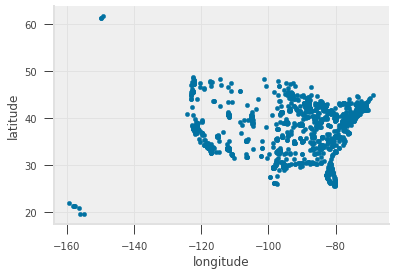

In [187]:
#extrae los datos interesantes
latlong.plot.scatter( "longitude","latitude")

In [188]:
latlong.describe()

,latitude,longitude
count,1839.000000,1839.000000
mean,37.791238,-91.986881
std,5.272299,16.108046
min,19.647855,-159.376962
25%,33.882605,-98.268828
50%,38.955432,-87.746346
75%,41.658341,-80.084833
max,61.577919,-68.742331


Para entender un poco más, nos auxiliaremos de una librería para graficar datos geográficos. Esto nos ayudara a tener un mejor entendimiento de ellos.




In [189]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline
# activate plot theme
import qeds
qeds.themes.mpl_style();

In [190]:
df["Coordinates"] = list(zip(df.longitude, df.latitude))
df["Coordinates"] = df["Coordinates"].apply(Point)
df.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417369999999 33.2242254)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98977789999999 33.3345501)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593169999999 30.6028747)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.9715595 34.5601477)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.4464222 31.2660613)


In [191]:
gdf = gpd.GeoDataFrame(df, geometry="Coordinates")
gdf.head()

,name,latitude,longitude,address,phone,website,Coordinates
0,Alabaster,33.224225,-86.804174,"250 S Colonial Dr, Alabaster, AL 35007-4657",205-564-2608,https://www.target.com/sl/alabaster/2276,POINT (-86.80417 33.22423)
1,Bessemer,33.334550,-86.989778,"4889 Promenade Pkwy, Bessemer, AL 35022-7305",205-565-3760,https://www.target.com/sl/bessemer/2375,POINT (-86.98978 33.33455)
2,Daphne,30.602875,-87.895932,"1698 US Highway 98, Daphne, AL 36526-4252",251-621-3540,https://www.target.com/sl/daphne/1274,POINT (-87.89593 30.60287)
3,Decatur,34.560148,-86.971559,"1235 Point Mallard Pkwy SE, Decatur, AL 35601-...",256-898-3036,https://www.target.com/sl/decatur/2084,POINT (-86.97156 34.56015)
4,Dothan,31.266061,-85.446422,"4601 Montgomery Hwy, Dothan, AL 36303-1522",334-340-1112,https://www.target.com/sl/dothan/1468,POINT (-85.44642 31.26606)


In [192]:
#mapa

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

,pop_est,continent,name,gdp_md_est,geometry
iso_a3,,,,,
FJI,920938,Oceania,Fiji,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
TZA,53950935,Africa,Tanzania,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
ESH,603253,Africa,W. Sahara,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
CAN,35623680,North America,Canada,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
USA,326625791,North America,United States of America,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [193]:
#graficar el mapa
world.name.unique()

array(['Fiji', 'Tanzania', 'W. Sahara', 'Canada',
       'United States of America', 'Kazakhstan', 'Uzbekistan',
       'Papua New Guinea', 'Indonesia', 'Argentina', 'Chile',
       'Dem. Rep. Congo', 'Somalia', 'Kenya', 'Sudan', 'Chad', 'Haiti',
       'Dominican Rep.', 'Russia', 'Bahamas', 'Falkland Is.', 'Norway',
       'Greenland', 'Fr. S. Antarctic Lands', 'Timor-Leste',
       'South Africa', 'Lesotho', 'Mexico', 'Uruguay', 'Brazil',
       'Bolivia', 'Peru', 'Colombia', 'Panama', 'Costa Rica', 'Nicaragua',
       'Honduras', 'El Salvador', 'Guatemala', 'Belize', 'Venezuela',
       'Guyana', 'Suriname', 'France', 'Ecuador', 'Puerto Rico',
       'Jamaica', 'Cuba', 'Zimbabwe', 'Botswana', 'Namibia', 'Senegal',
       'Mali', 'Mauritania', 'Benin', 'Niger', 'Nigeria', 'Cameroon',
       'Togo', 'Ghana', "Côte d'Ivoire", 'Guinea', 'Guinea-Bissau',
       'Liberia', 'Sierra Leone', 'Burkina Faso', 'Central African Rep.',
       'Congo', 'Gabon', 'Eq. Guinea', 'Zambia', 'Malawi', 'M

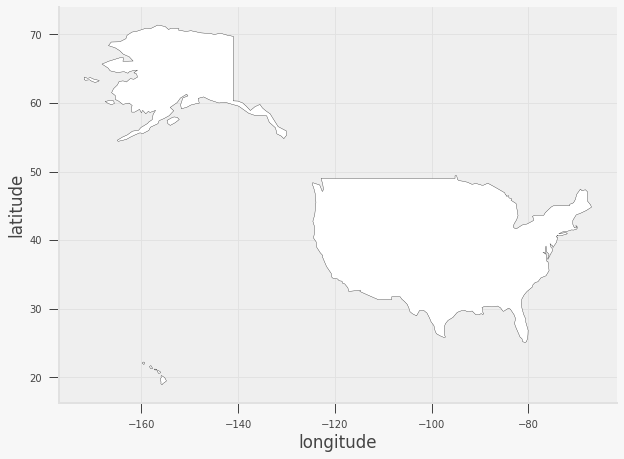

In [194]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

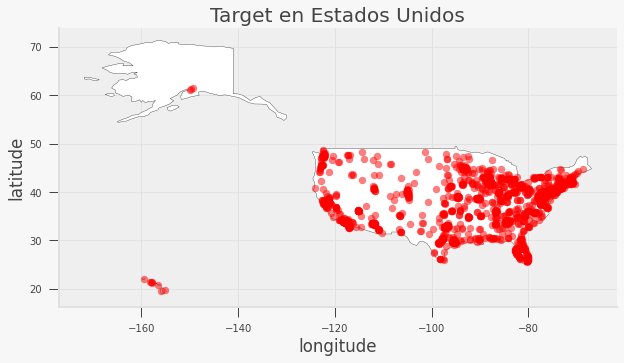

In [195]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
gdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Target en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

¿qué tal ahora?, tiene mayor sentido verdad, entonces los datos lejanos no eran atípicos, de aquí la importancia de ver los datos con el tipo de gráfica correcta.

Ahora sí, implementa K means a los datos de latitud y longitud :) y encuentra donde colocar los almacenes. 

Nota: si te llama la atención implementar alguna otra visualización con otra librería, lo puedes hacer, no hay restricciones.

In [196]:
#Importamos las librerías requeridas
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.metrics import pairwise_distances_argmin_min

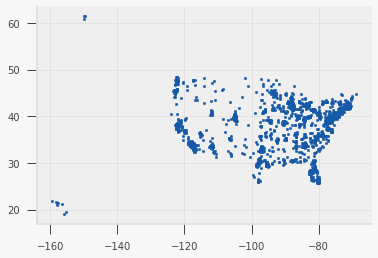

In [197]:
#Capturamos las coordenadas a través de la longitud y latitud
Coordenadas = list(zip(df.longitude, df.latitude))
Centro_Blobs = Coordenadas

#Utilizamos la función make_blobs para visualizar graficamente la distribución actual de las tiendas
X, y_true = make_blobs(n_samples=1839, centers=Centro_Blobs, cluster_std=0.20, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=7);

***************************************************************
El valor óptimo de 'K' según el visualizador Elbow es: 5
***************************************************************


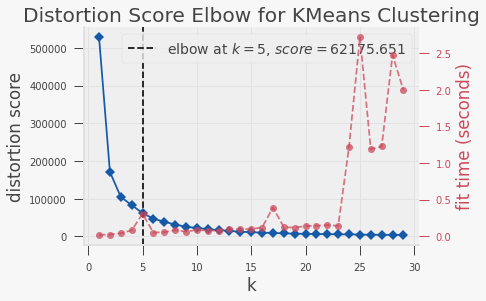

In [198]:
#Instanciamos nuestro modelo KMeans
Modelo_KMeans=KMeans()

#Instanciamos nuestro objeto visual utilizando el visualizador Kelbow, este nos mostrará en el codo de la línea azul el número óptimo de clusteres
#para el modelo KMeans utilizado. En mi caso indicaré un rango de valores K que va desde 1 hasta 15.
Modelo_Visual = KElbowVisualizer(Modelo_KMeans, k=(1,30))
Modelo_Visual.fit(X)

#Obtenemos el mejor valor K según el visualizador
print("***************************************************************")
print("El valor óptimo de 'K' según el visualizador Elbow es:", Modelo_Visual.elbow_value_)
print("***************************************************************")

Modelo_Visual.show()



---

☝ Observamos que para el score 'distortion', que es la métrica por defecto para el visualizador Elbow nos indica que el número óptimo de clusters es 5.

---





---

✍ Ahora con el valor óptimo de 'K' (**5**) obtenido con el visualizador Elbow ejecutaremos el modelo KMeans, de tal forma que podamos entrenar el modelo generando las predicciones requeridas en aras de seleccionar las recomendaciones de nuevas tiendas para Target.

---




In [199]:
#Instanciamos nuestro modelo KMeans ideal
Modelo_KMeans_Ideal = KMeans(n_clusters=Modelo_Visual.elbow_value_, random_state=42)
#Realizamos nuestra predicción
y_new_tiendas = Modelo_KMeans_Ideal.fit_predict(X)
#Verificamos los clusters generados
Modelo_KMeans_Ideal.cluster_centers_

array([[ -88.39079138,   41.81345068],
       [-119.17278297,   37.58060859],
       [ -82.98128354,   31.08981689],
       [ -75.63503338,   40.31506512],
       [ -98.27591607,   34.43992606]])

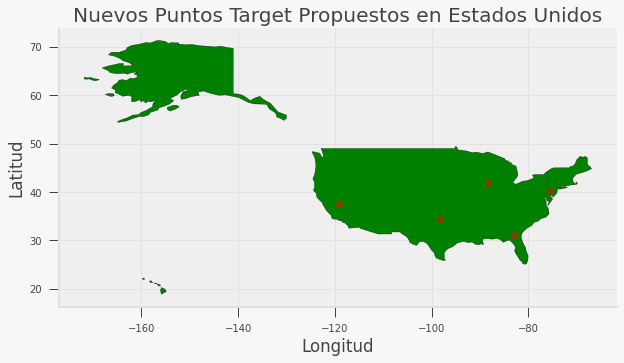

In [200]:
#Creamos un nuevo dataframe con las columnas de latitud y longitud para crear la nueva columna "Coordenadas", de tal manera que podamos graficar.
dfClusters = pd.DataFrame(Modelo_KMeans_Ideal.cluster_centers_, columns = ['Latitud','Longitud'])
dfClusters["Coordenadas"] = list(zip(dfClusters.Latitud, dfClusters.Longitud))
dfClusters["Coordenadas"] = dfClusters["Coordenadas"].apply(Point)
gdf = gpd.GeoDataFrame(dfClusters, geometry="Coordenadas")

fig, gax = plt.subplots(figsize=(10,10))

#Indicamos el país en el que utilizaremos las coordenadas del dataframe e indicamos que queremos colorear el mapa en color verde
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='green')

#Queremos visualizar los puntos de nuevas tiendas en rojo
gdf.plot(ax=gax, color='Red', alpha = 0.5)

#Ajustamos las etiquetas de los ejes
gax.set_xlabel('Longitud')
gax.set_ylabel('Latitud')
gax.set_title('Nuevos Puntos Target Propuestos en Estados Unidos')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

---


Encuentra las latitudes y longitudes de los almacenes, ¿que ciudad es?, ¿a cuantas tiendas va surtir?, ¿sabes a que distancia estara?
¿Cómo elegiste el numero de almacenes?, justifica tu respuesta tecnicamente?


---

🌍 **Latitud y longitud para tiendas propuestas:**

In [201]:
#Imprimimos la información almacenada en el cluster según los hallazgos del modelo KMeans ideal.
for i in range(len(dfClusters)):
    print("***********")
    print("Tienda", str(i+1) + ":")
    print("Latitud:", str(dfClusters.iloc[i]['Latitud']) + " - Longitud:", str(dfClusters.iloc[i]['Longitud']))

***********
Tienda 1:
Latitud: -88.39079137971156 - Longitud: 41.813450682249126
***********
Tienda 2:
Latitud: -119.17278297187282 - Longitud: 37.580608585006736
***********
Tienda 3:
Latitud: -82.98128353950088 - Longitud: 31.08981688864523
***********
Tienda 4:
Latitud: -75.6350333796743 - Longitud: 40.31506512311014
***********
Tienda 5:
Latitud: -98.2759160699751 - Longitud: 34.439926058831674


---


🏙 **Ciudades para tiendas propuestas:**

In [202]:
#Obtenemos las latitudes y longitudes de los almacenes más cercanos para los puntos identificados con el fin de contar con una referencia
#geográfica cercana, pero teniendo en cuenta que la ciudad se encuentra dentro del campo de dirección "Address", debemos dividir la celda en
#varias columnas para extraer la ciudad.
dfDirecciones = df["address"].str.split(',',expand=True)
dfDirecciones.columns = ['Direccion', 'Ciudad', 'Estado', 'Telefono']
dfCiudades=dfDirecciones["Ciudad"].str.split(expand=True)
dfCiudades.drop([1, 2], axis=1, inplace=True)
dfCiudades=dfCiudades[0]

Cercanos, _ = pairwise_distances_argmin_min(Modelo_KMeans_Ideal.cluster_centers_, X)

#Tomaremos como referencia las ciudades más cercanas a los puntos encontrados
C = 1
Ciudades_Propuestas=list()

for Registro in Cercanos:
    print("***********")
    print("Tienda", str(C) + ":")
    print("Ciudad:", dfCiudades[Registro])
    C = C + 1
    #Vamos creando una nueva lista para buscar las tiendas cercanas a abastecer según la ciudad.
    Ciudades_Propuestas.append(dfCiudades[Registro])

***********
Tienda 1:
Ciudad: Tacoma
***********
Tienda 2:
Ciudad: Vacaville
***********
Tienda 3:
Ciudad: Aurora
***********
Tienda 4:
Ciudad: Monaca
***********
Tienda 5:
Ciudad: Cheektowaga


---
🏪 **Tiendas a surtir:**


In [212]:
#Con las ciudades identificadas, procederemos a buscar las tiendas ubicadas en estas para validar cuales se podrán surtir con las propuestas.
#Creamos un nuevo dataframe para asignarle la latitud, longitud y la cantidad que se predijo con el modelo KMeans
dfUbicacionTiendasxCiudad =  pd.DataFrame(df)
dfUbicacionTiendasxCiudad.drop(dfUbicacionTiendasxCiudad.iloc[:, 3:7],axis = 1, inplace=True)
dfUbicacionTiendasxCiudad.drop(dfUbicacionTiendasxCiudad.iloc[:, 0:1],axis = 1, inplace=True)
dfUbicacionTiendasxCiudad['Cantidad'] = y_new_tiendas
#Creamos el dataframe que contendrá los datos de las ciudades propuestas en el punto anterior agrupadas por tienda existente.
dfTiendasxCiudad =  pd.DataFrame()
dfTiendasxCiudad['Ciudades Propuestas']=Ciudades_Propuestas
dfTiendasxCiudad['Tiendas Atendidas x Ciudad']=dfUbicacionTiendasxCiudad.groupby('Cantidad').size()
dfTiendasxCiudad

,Ciudades Propuestas,Tiendas Atendidas x Ciudad
0,Tacoma,419
1,Vacaville,368
2,Aurora,272
3,Monaca,483
4,Cheektowaga,297


---


🚧 **Distancia tiendas propuestas:**

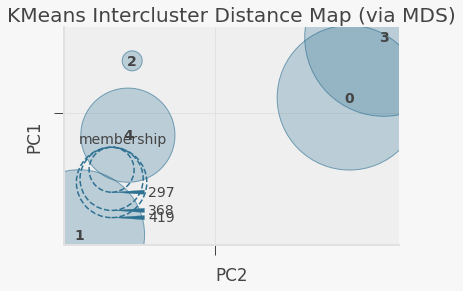

In [243]:
#Visualizamos la distancia entre los clusters identificados utilizando un visualizador "Intercluster Distance Map"
Visualizador_MDS = InterclusterDistance(Modelo_KMeans_Ideal)
#Ajustamos los datos en el visualizador
Visualizador_MDS.fit(y_new_tiendas)
#Graficamos los datos
Visualizador_MDS.show()


---
☝ Con esta herramienta de visualización podemos observar gráficamente la distancia entre las tiendas propuestas, pero ahora veamos a través de una tabla la distancia entre estas nuevas tiendas y las existentes.

---

In [242]:
#Creamos un dataframe llamada "Distancia Tiendas" en el que agregaremos los registros de todas las tiendas existentes y en el que calcularemos
#la distancia de las tiendas existentes con relación a las propuestas de acuerdo al resultado del modelo KMeans ideal.
dfDistanciaTiendas=pd.DataFrame(Modelo_KMeans_Ideal.transform(X).round(0))
dfDistanciaTiendas=dfDistanciaTiendas.set_axis(pd.DataFrame(Ciudades_Propuestas),axis=1)
dfDistanciaTiendas=dfDistanciaTiendas.set_axis(dfCiudades,axis=0)

print("******************************************************************************************************************")
print("A continuación se visualiza la distancia de las tiendas propuestas con los punto de venta existentes para Target:")
print("******************************************************************************************************************")

dfDistanciaTiendas

******************************************************************************************************************
A continuación se visualiza la distancia de las tiendas propuestas con los punto de venta existentes para Target:
******************************************************************************************************************


,"(Tacoma,)","(Vacaville,)","(Aurora,)","(Monaca,)","(Cheektowaga,)"
0,,,,,
Alabaster,32.0,3.0,36.0,44.0,21.0
Bessemer,9.0,23.0,16.0,21.0,5.0
Daphne,2.0,31.0,14.0,13.0,14.0
Decatur,30.0,5.0,34.0,42.0,19.0
Dothan,34.0,3.0,40.0,47.0,24.0
...,...,...,...,...,...
Waukesha,30.0,4.0,35.0,43.0,20.0
Waukesha,5.0,27.0,16.0,17.0,11.0
Casper,10.0,39.0,5.0,7.0,18.0


---

✍ **Conclusión:** A través del método de clasificación no supervisada K-Means pudimos identificar el número ideal de tiendas a crear, ya que al hacer uso de la herramienta de visualización Kelbow pudimos validar el número óptimo de clusters, esto debido a la agrupación que realizó el algoritmo minimizando las sumas de las distancias entre cada nodo (tienda) y el centro del grupo al que están asociados según sus características dentro del conjunto de datos. En mi caso le recomendaría a **TARGET** crear **5** puntos de venta en las ciudades de **Tacoma**, **Vacaville**, **Aurora**, **Monaca** y **Cheektowaga**. Asímismo, con la distribución mostrada en la sección de **"Tiendas a Surtir"** podrían validar la distribución logística que deberían tener en cuenta con estos nuevos puntos de venta.

---